In [13]:
import torch
from torchvision import datasets, transforms
from collections import OrderedDict
from multiae import mcVAE, DVCCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

### Load the MNIST data

In [11]:
MNIST_1 = datasets.MNIST('./data/MNIST', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor()
    ]))
MNIST_2 = datasets.MNIST('./data/MNIST', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),        
    ]))

data_1 = MNIST_1.train_data.reshape(-1, 784).float() / 255.
target = MNIST_1.train_labels
data_2 = MNIST_2.train_data.float()
data_2 = torch.rot90(data_2, 1, [1, 2])
data_2 = data_2.reshape(-1,784)/255.

MNIST_1 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor()
    ]))
MNIST_2 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),        
    ]))

data_test_1 = MNIST_1.test_data.reshape(-1, 784).float() / 255.
target_test = MNIST_1.test_labels.numpy()
data_test_2 = MNIST_2.test_data.float() / 255.
data_test_2 = torch.rot90(data_test_2, 1, [1, 2])
data_test_2 = data_test_2.reshape(-1,784)


c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### Define parameters

In [3]:
input_dims=[784, 784]
max_epochs = 10
batch_size = 2000
latent_dim = 2

### Define models

In [4]:
mcvae = mcVAE(
        network='MNIST',
        input_dims=input_dims,
        z_dim=latent_dim,
    )
dvcca = DVCCA(
        network='MNIST',
        input_dims=input_dims,
        z_dim=latent_dim,
    )


### Train the models

In [5]:

mcvae.fit(data_1, data_2, max_epochs=max_epochs, batch_size=batch_size)
dvcca.fit(data_1, data_2, max_epochs=max_epochs, batch_size=batch_size)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name     | Type       | Params
----------------------------------------
0 | encoders | ModuleList | 1.1 M 
1 | decoders | ModuleList | 1.1 M 
----------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.551     Total estimated model params size (MB)
c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:631: UserWarning: Checkpoint directory C:\Users\anala\Documents\PhD\library_dev\mcVAE\2022_08_04_1733 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\pytorch_lightning\trainer\data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\pytorch_lightning\trainer\data_loading.py:428: UserWarning: The number of training samples (27) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it, loss=217, v_num=0, train_loss_step=211.0, train_kl_step=3.640, train_ll_step=-207., val_loss=209.0, val_kl=3.550, val_ll=-206.]

Metric val_loss improved. New best score: 209.397


Epoch 1: 100%|██████████| 30/30 [00:44<00:00,  1.49s/it, loss=194, v_num=0, train_loss_step=190.0, train_kl_step=6.260, train_ll_step=-183., val_loss=189.0, val_kl=6.240, val_ll=-183., train_loss_epoch=235.0, train_kl_epoch=1.460, train_ll_epoch=-233.]

Metric val_loss improved by 20.440 >= min_delta = 0.001. New best score: 188.957


Epoch 2: 100%|██████████| 30/30 [00:44<00:00,  1.48s/it, loss=181, v_num=0, train_loss_step=179.0, train_kl_step=7.540, train_ll_step=-172., val_loss=178.0, val_kl=7.490, val_ll=-171., train_loss_epoch=200.0, train_kl_epoch=4.920, train_ll_epoch=-195.]

Metric val_loss improved by 10.861 >= min_delta = 0.001. New best score: 178.096


Epoch 3: 100%|██████████| 30/30 [00:49<00:00,  1.66s/it, loss=173, v_num=0, train_loss_step=172.0, train_kl_step=8.300, train_ll_step=-164., val_loss=171.0, val_kl=8.340, val_ll=-163., train_loss_epoch=185.0, train_kl_epoch=6.960, train_ll_epoch=-178.]

Metric val_loss improved by 6.942 >= min_delta = 0.001. New best score: 171.154


Epoch 4: 100%|██████████| 30/30 [00:45<00:00,  1.52s/it, loss=167, v_num=0, train_loss_step=167.0, train_kl_step=8.820, train_ll_step=-158., val_loss=166.0, val_kl=8.830, val_ll=-157., train_loss_epoch=175.0, train_kl_epoch=8.000, train_ll_epoch=-167.]

Metric val_loss improved by 5.217 >= min_delta = 0.001. New best score: 165.937


Epoch 5: 100%|██████████| 30/30 [00:52<00:00,  1.74s/it, loss=163, v_num=0, train_loss_step=162.0, train_kl_step=9.060, train_ll_step=-153., val_loss=162.0, val_kl=9.090, val_ll=-153., train_loss_epoch=169.0, train_kl_epoch=8.600, train_ll_epoch=-160.]

Metric val_loss improved by 3.776 >= min_delta = 0.001. New best score: 162.161


Epoch 6: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it, loss=160, v_num=0, train_loss_step=159.0, train_kl_step=9.390, train_ll_step=-150., val_loss=160.0, val_kl=9.360, val_ll=-150., train_loss_epoch=164.0, train_kl_epoch=8.980, train_ll_epoch=-155.]

Metric val_loss improved by 2.558 >= min_delta = 0.001. New best score: 159.603


Epoch 7: 100%|██████████| 30/30 [00:55<00:00,  1.86s/it, loss=158, v_num=0, train_loss_step=158.0, train_kl_step=9.710, train_ll_step=-148., val_loss=158.0, val_kl=9.630, val_ll=-148., train_loss_epoch=161.0, train_kl_epoch=9.260, train_ll_epoch=-152.]

Metric val_loss improved by 1.777 >= min_delta = 0.001. New best score: 157.826


Epoch 8: 100%|██████████| 30/30 [00:44<00:00,  1.48s/it, loss=157, v_num=0, train_loss_step=156.0, train_kl_step=9.780, train_ll_step=-146., val_loss=156.0, val_kl=9.720, val_ll=-147., train_loss_epoch=159.0, train_kl_epoch=9.460, train_ll_epoch=-150.]

Metric val_loss improved by 1.504 >= min_delta = 0.001. New best score: 156.322


Epoch 9: 100%|██████████| 30/30 [00:55<00:00,  1.84s/it, loss=155, v_num=0, train_loss_step=154.0, train_kl_step=9.940, train_ll_step=-144., val_loss=155.0, val_kl=9.830, val_ll=-145., train_loss_epoch=157.0, train_kl_epoch=9.630, train_ll_epoch=-148.]

Metric val_loss improved by 1.219 >= min_delta = 0.001. New best score: 155.103


Epoch 9: 100%|██████████| 30/30 [00:56<00:00,  1.87s/it, loss=155, v_num=0, train_loss_step=154.0, train_kl_step=9.940, train_ll_step=-144., val_loss=155.0, val_kl=9.830, val_ll=-145., train_loss_epoch=156.0, train_kl_epoch=9.780, train_ll_epoch=-146.]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name             | Type       | Params
------------------------------------------------
0 | encoder          | ModuleList | 534 K 
1 | private_encoders | ModuleList | 1.1 M 
2 | decoders         | ModuleList | 1.1 M 
------------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.692    Total estimated model params size (MB)
c:\Users\anala\Anaconda3\envs\multiae\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:631: UserWarning: Checkpoint directory C:\Users\anala\Documents\PhD\library_dev\DVCCA\2022_08_04_1741 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Epoch 0: 100%|██████████| 30/30 [01:12<00:00,  2.41s/it, loss=108, v_num=0, train_loss_step=108.0, train_kl_step=0.737, train_ll_step=-107., val_loss=107.0, val_kl=0.719, val_ll=-106.]

Metric val_loss improved. New best score: 106.774


Epoch 1: 100%|██████████| 30/30 [01:08<00:00,  2.27s/it, loss=98, v_num=0, train_loss_step=96.70, train_kl_step=4.580, train_ll_step=-92.1, val_loss=96.00, val_kl=4.580, val_ll=-91.5, train_loss_epoch=117.0, train_kl_epoch=0.195, train_ll_epoch=-117.]  

Metric val_loss improved by 10.737 >= min_delta = 0.001. New best score: 96.036


Epoch 2: 100%|██████████| 30/30 [00:56<00:00,  1.89s/it, loss=93.6, v_num=0, train_loss_step=92.90, train_kl_step=5.220, train_ll_step=-87.6, val_loss=92.30, val_kl=5.200, val_ll=-87.1, train_loss_epoch=102.0, train_kl_epoch=2.770, train_ll_epoch=-99.0]

Metric val_loss improved by 3.711 >= min_delta = 0.001. New best score: 92.326


Epoch 3: 100%|██████████| 30/30 [00:59<00:00,  1.98s/it, loss=91.8, v_num=0, train_loss_step=91.40, train_kl_step=6.030, train_ll_step=-85.4, val_loss=90.90, val_kl=6.090, val_ll=-84.8, train_loss_epoch=94.40, train_kl_epoch=5.020, train_ll_epoch=-89.4]

Metric val_loss improved by 1.387 >= min_delta = 0.001. New best score: 90.939


Epoch 4: 100%|██████████| 30/30 [00:55<00:00,  1.84s/it, loss=90, v_num=0, train_loss_step=90.10, train_kl_step=6.720, train_ll_step=-83.3, val_loss=89.60, val_kl=6.670, val_ll=-82.9, train_loss_epoch=92.20, train_kl_epoch=5.800, train_ll_epoch=-86.4]  

Metric val_loss improved by 1.332 >= min_delta = 0.001. New best score: 89.607


Epoch 5: 100%|██████████| 30/30 [00:58<00:00,  1.94s/it, loss=88.5, v_num=0, train_loss_step=88.00, train_kl_step=6.740, train_ll_step=-81.3, val_loss=87.80, val_kl=6.750, val_ll=-81.1, train_loss_epoch=90.40, train_kl_epoch=6.290, train_ll_epoch=-84.1]

Metric val_loss improved by 1.794 >= min_delta = 0.001. New best score: 87.812


Epoch 6: 100%|██████████| 30/30 [01:10<00:00,  2.34s/it, loss=86.8, v_num=0, train_loss_step=86.50, train_kl_step=6.840, train_ll_step=-79.7, val_loss=86.30, val_kl=6.740, val_ll=-79.6, train_loss_epoch=88.70, train_kl_epoch=6.550, train_ll_epoch=-82.1]

Metric val_loss improved by 1.488 >= min_delta = 0.001. New best score: 86.325


Epoch 7: 100%|██████████| 30/30 [00:53<00:00,  1.79s/it, loss=85.4, v_num=0, train_loss_step=85.00, train_kl_step=7.000, train_ll_step=-78.0, val_loss=84.90, val_kl=6.950, val_ll=-78.0, train_loss_epoch=87.10, train_kl_epoch=6.660, train_ll_epoch=-80.5]

Metric val_loss improved by 1.399 >= min_delta = 0.001. New best score: 84.925


Epoch 8: 100%|██████████| 30/30 [01:00<00:00,  2.02s/it, loss=84.3, v_num=0, train_loss_step=83.90, train_kl_step=7.240, train_ll_step=-76.6, val_loss=83.90, val_kl=7.150, val_ll=-76.8, train_loss_epoch=85.70, train_kl_epoch=6.830, train_ll_epoch=-78.9]

Metric val_loss improved by 0.989 >= min_delta = 0.001. New best score: 83.936


Epoch 9: 100%|██████████| 30/30 [00:57<00:00,  1.92s/it, loss=83.5, v_num=0, train_loss_step=82.90, train_kl_step=7.360, train_ll_step=-75.5, val_loss=83.10, val_kl=7.270, val_ll=-75.8, train_loss_epoch=84.50, train_kl_epoch=7.030, train_ll_epoch=-77.5]

Metric val_loss improved by 0.879 >= min_delta = 0.001. New best score: 83.057


Epoch 9: 100%|██████████| 30/30 [00:58<00:00,  1.94s/it, loss=83.5, v_num=0, train_loss_step=82.90, train_kl_step=7.360, train_ll_step=-75.5, val_loss=83.10, val_kl=7.270, val_ll=-75.8, train_loss_epoch=83.60, train_kl_epoch=7.280, train_ll_epoch=-76.3]


### Create latent plots - how well does the latent space separate MNIST labels?

In [10]:
mcvae_latent_1, mcvae_latent_2 = mcvae.predict_latents(data_test_1, data_test_2)
dvcca_latent_1, dvcca_latent_2 = dvcca.predict_latents(data_test_1, data_test_2)

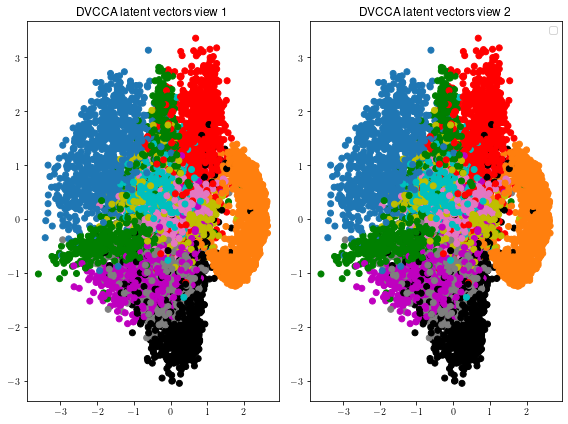

In [16]:
colors =        {0: 'tab:blue',
                 1:'tab:orange',
                 2: 'r',
                 3: 'c',
                 4: 'm',
                 5: 'y',
                 6: 'g',
                 7: 'k',
                 8: 'tab:pink',
                 9: 'tab:gray'
                 }
fig=plt.figure(figsize=(8,6)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(dvcca_latent_1[:,0], dvcca_latent_1[:,1], c=pd.Series(target_test).map(colors))
ax1.set_title('DVCCA latent vectors view 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(dvcca_latent_2[:,0], dvcca_latent_2[:,1], c=pd.Series(target_test).map(colors))
ax2.set_title('DVCCA latent vectors view 2')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.show()

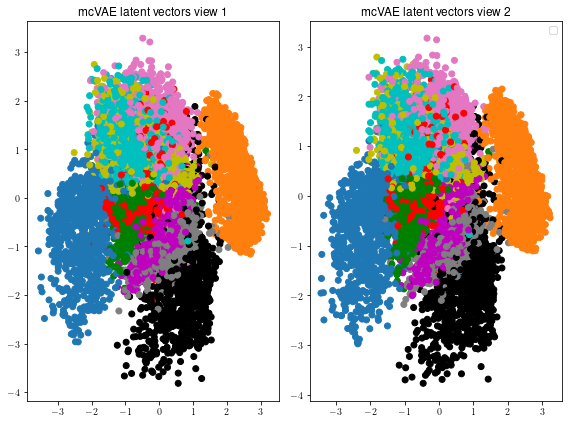

In [17]:
fig=plt.figure(figsize=(8,6)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(mcvae_latent_1[:,0], mcvae_latent_1[:,1], c=pd.Series(target_test).map(colors))
ax1.set_title('mcVAE latent vectors view 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(mcvae_latent_2[:,0], mcvae_latent_2[:,1], c=pd.Series(target_test).map(colors))
ax2.set_title('mcVAE latent vectors view 2')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.show()

### mcVAE reconstruction example

In [18]:
pred = mcvae.predict_reconstruction(data_1, data_2)

### Reconstruction plots - how well can the VAE do same view reconstruction?

In [19]:
data_sample = data_1[20]
#indices: view 1 latent, view 1 decoder, sample 21
pred_sample = pred[0][0][20]

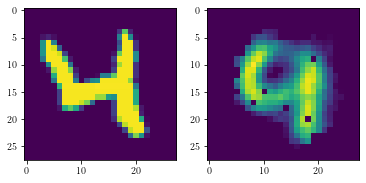

In [20]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))

### Reconstruction plots - how well can the VAE do cross view reconstruction?

In [21]:
data_sample = data_1[20]
#indices: view 1 latent, view 2 decoder, sample 21
pred_sample = pred[1][0][20]

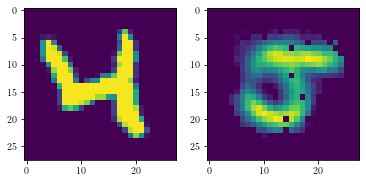

In [22]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))